## IMPORTS AND LOADING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat #cannot be used for loading because the mat version is 7.3
import h5py

In [5]:
# Load the Parquet file
df = pd.read_parquet('TFM_METADATA_FIRSTCUT.parquet')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4573 non-null   float64
 1   PARTICIPANT     4573 non-null   float64
 2   T               4573 non-null   float64
 3   ET              4573 non-null   float64
 4   datasize        4573 non-null   float64
 5   PRODUCT_DH      4573 non-null   float64
 6   WEIGHT          4573 non-null   float64
 7   SPAN_1          4573 non-null   float64
 8   SPAN_2          4573 non-null   float64
 9   SHAPE_SPAN_1    4573 non-null   float64
 10  SHAPE_SPAN_2    4573 non-null   float64
 11  AD              4573 non-null   float64
 12  SPAN_DH         4573 non-null   float64
 13  GRASP_DH        4573 non-null   float64
 14  ORI_PRODUCT_DH  4573 non-null   float64
 15  ACTION_DH       4573 non-null   float64
 16  TASK_HEIGHT     4573 non-null   float64
 17  GENDER          4573 non-null   f

In [7]:
df

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
0,1.0,1.0,102.0,1.0,2625.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
1,2.0,1.0,102.0,4.0,1452.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
2,3.0,1.0,103.0,7.0,3200.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
3,4.0,1.0,103.0,10.0,1219.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
4,5.0,1.0,104.0,13.0,2981.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568,4569.0,26.0,344.0,597.0,1751.0,81.0,228.0,78.0,11.0,2.0,...,1.0,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4569,4570.0,26.0,345.0,601.0,1970.0,97.0,0.0,5.0,6.0,2.0,...,1.0,5.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4570,4571.0,26.0,346.0,604.0,2236.0,98.0,22.7,15.0,0.0,1.0,...,1.0,7.0,2.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4571,4572.0,26.0,347.0,608.0,2298.0,99.0,133.0,2.0,0.5,7.0,...,1.0,9.0,4.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0


In [8]:
counts_task_participant = df.groupby('T')['PARTICIPANT'].value_counts().unstack(fill_value=0)
counts_task_participant

PARTICIPANT,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
T,,,,,,,,,,,,,,,,,,,,,
102.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
103.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
104.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
105.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
106.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
345.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
346.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


## 1- PRELIMINAR ANALYSIS DATASIZE FOR SCALING SIGNALS

### HISTOGRAM OF DATA SIZE (NUMBER OF SAMPLES FOR EACH EMG RECORDING)

In [9]:
# Select the column to analyze
column_data = df['datasize']
column_data

0       2625.0
1       1452.0
2       3200.0
3       1219.0
4       2981.0
         ...  
4568    1751.0
4569    1970.0
4570    2236.0
4571    2298.0
4572    1843.0
Name: datasize, Length: 4573, dtype: float64

**número máximo y mínimo de samples**

In [10]:
# Print the maximum and minimum values of the column
print("Maximum num of samples:", column_data.max())
print("Minimum num of samples:", column_data.min())

Maximum num of samples: 6346.0
Minimum num of samples: 50.0


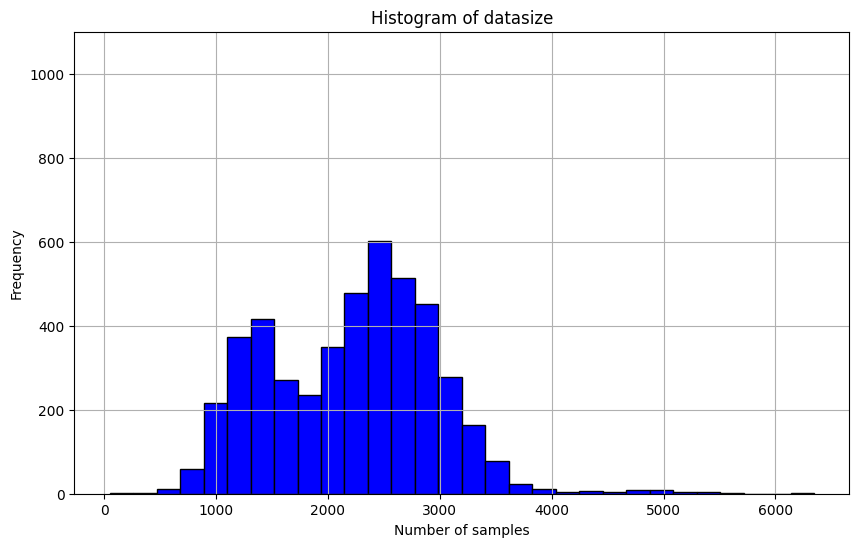

In [44]:
# histogram of the column values
plt.figure(figsize=(10, 6))
plt.hist(column_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of ' + 'datasize')
plt.xlabel('Number of samples')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1100, 200))
plt.ylim(0, 1100)
plt.grid(True)
plt.show()

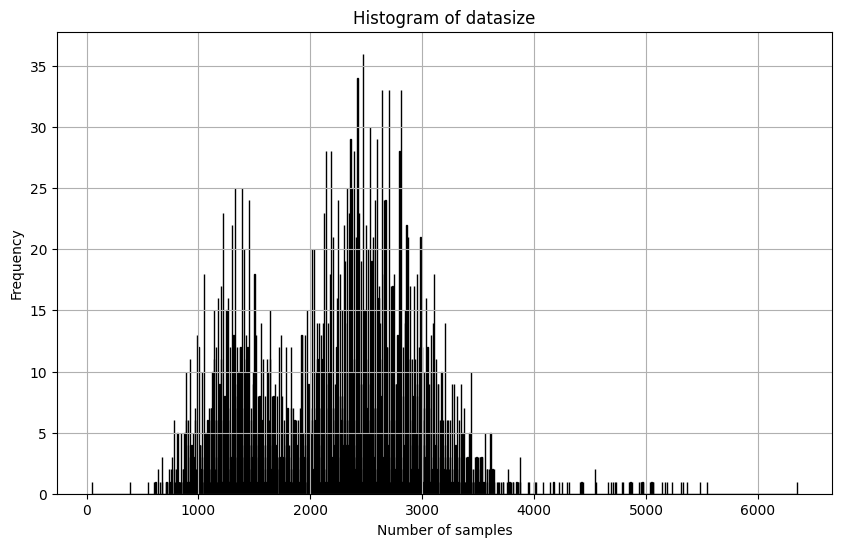

In [12]:
# histogram of the column values individual bins for each sample
plt.figure(figsize=(10, 6))
plt.hist(column_data, bins=4573, color='blue', edgecolor='black')
plt.title('Histogram of ' + 'datasize')
plt.xlabel('Number of samples')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
column = 'datasize'


**frecuencias máximas y mínimas**

In [14]:
# Calculate the frequency of each value in the column
frequency = df[column].value_counts()

# Get the value with the maximum frequency
max_freq_value = frequency.idxmax()

# Print the most frequent value and its frequency
print("Value with the maximum frequency:", max_freq_value)
print("Frequency of this value:", frequency[max_freq_value])

Value with the maximum frequency: 2469.0
Frequency of this value: 29


In [15]:
min_freq_value = frequency.idxmin()

# Print the most frequent value and its frequency
print("Value with the minimum frequency:", min_freq_value)
print("Frequency of this value:", frequency[min_freq_value])

Value with the minimum frequency: 1189.0
Frequency of this value: 1


In [16]:
# Checking the frequencies
desired_value = 2469
filtered_df = df[df[column] == desired_value]

print(" Num of rows where", column, "is ", desired_value, ":")
#display(filtered_df)
filtered_df.info() #num of entries == frequency of the value

 Num of rows where datasize is  2469 :
<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 226 to 4505
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              29 non-null     float64
 1   PARTICIPANT     29 non-null     float64
 2   T               29 non-null     float64
 3   ET              29 non-null     float64
 4   datasize        29 non-null     float64
 5   PRODUCT_DH      29 non-null     float64
 6   WEIGHT          29 non-null     float64
 7   SPAN_1          29 non-null     float64
 8   SPAN_2          29 non-null     float64
 9   SHAPE_SPAN_1    29 non-null     float64
 10  SHAPE_SPAN_2    29 non-null     float64
 11  AD              29 non-null     float64
 12  SPAN_DH         29 non-null     float64
 13  GRASP_DH        29 non-null     float64
 14  ORI_PRODUCT_DH  29 non-null     float64
 15  ACTION_DH       29 non-null     float64
 16  TASK_HEIGHT     29 non-null     float64
 17 

In [17]:
frequency.info()

<class 'pandas.core.series.Series'>
Index: 1156 entries, 2469.0 to 1993.0
Series name: count
Non-Null Count  Dtype
--------------  -----
1156 non-null   int64
dtypes: int64(1)
memory usage: 50.4 KB


### EXTRACTING MEDIAN VALUES (for first rescaling try)
(buscar filas que corresponden a la mediana, a la mitad de la mediana y al doble)

In [18]:
def find_closest_rows(df, column_name):

    median = df[column_name].median()
    half_median = median / 2
    double_median = median * 2

    print(median, half_median, double_median)

    # closest value to a target in a column
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]

    # closest row for each target value
    nearest_median = find_nearest(df[column_name], median)
    nearest_half_median = find_nearest(df[column_name], half_median)
    nearest_double_median = find_nearest(df[column_name], double_median)

    # corresponding rows
    median_row = df[df[column_name] == nearest_median]
    half_median_row = df[df[column_name] == nearest_half_median]
    double_median_row = df[df[column_name] == nearest_double_median]

    return median_row, half_median_row, double_median_row

In [19]:
median_row, half_median_row, double_median_row = find_closest_rows(df, "datasize")

2312.0 1156.0 4624.0


In [20]:
median_row

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
163,164.0,2.0,168.0,285.0,2312.0,105.0,1170.0,7.0,0.0,6.0,...,1.0,3.0,2.0,1.0,1.0,0.0,52.0,193.0,270.0,182.0
320,321.0,4.0,133.0,159.0,2312.0,16.0,746.5,22.0,0.0,4.0,...,1.0,1.0,1.0,1.0,2.0,0.0,39.0,200.0,275.0,180.0
328,329.0,4.0,141.0,185.0,2312.0,21.0,0.0,12.0,0.0,1.0,...,1.0,1.0,2.0,1.0,2.0,0.0,39.0,200.0,275.0,180.0
336,337.0,4.0,147.0,208.0,2312.0,27.0,122.0,3.0,0.0,6.0,...,1.0,2.0,2.0,1.0,1.0,0.0,39.0,200.0,275.0,180.0
439,440.0,5.0,154.0,242.0,2312.0,29.0,622.0,4.0,0.0,6.0,...,1.0,2.0,2.0,1.0,2.0,1.0,30.0,171.0,250.0,170.0
943,944.0,11.0,117.0,91.0,2312.0,14.0,2073.0,30.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,23.0,183.0,235.0,169.0
953,954.0,11.0,125.0,127.0,2312.0,7.0,508.0,61.0,29.0,1.0,...,1.0,1.0,1.0,1.0,2.0,0.0,23.0,183.0,235.0,169.0
1338,1339.0,15.0,138.0,175.0,2312.0,19.0,2995.5,28.5,0.0,3.0,...,1.0,1.0,1.0,1.0,2.0,0.0,47.0,185.0,260.0,170.0
1372,1373.0,15.0,175.0,319.0,2312.0,42.0,22.5,25.0,0.0,2.0,...,1.0,3.0,1.0,1.0,2.0,0.0,47.0,185.0,260.0,170.0
2693,2694.0,8.0,219.0,425.0,2312.0,18.0,1527.5,33.0,0.0,1.0,...,1.0,4.0,3.0,1.0,2.0,0.0,31.0,197.0,270.0,187.0


In [21]:
half_median_row

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
432,433.0,5.0,148.0,217.0,1156.0,28.0,212.0,3.0,0.0,6.0,...,1.0,2.0,2.0,1.0,2.0,1.0,30.0,171.0,250.0,170.0
1075,1076.0,12.0,149.0,223.0,1156.0,29.0,622.0,4.0,0.0,6.0,...,1.0,2.0,2.0,1.0,2.0,1.0,22.0,165.0,210.0,166.0
2315,2316.0,26.0,111.0,58.0,1156.0,9.0,965.0,77.0,30.0,1.0,...,1.0,1.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
3109,3110.0,19.0,202.0,343.0,1156.0,48.0,735.0,17.0,0.0,2.0,...,1.0,4.0,1.0,1.0,1.0,1.0,24.0,167.0,240.0,158.0
3794,3795.0,9.0,315.0,512.0,1156.0,76.0,109.0,17.0,0.0,7.0,...,1.0,9.0,2.0,1.0,2.0,1.0,21.0,173.0,250.0,169.0
4393,4394.0,30.0,345.0,601.0,1156.0,97.0,0.0,5.0,6.0,2.0,...,1.0,5.0,1.0,1.0,2.0,0.0,37.0,181.0,260.0,173.0


In [22]:
double_median_row

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
2183,2184.0,24.0,153.0,238.0,4657.0,28.0,212.0,3.0,0.0,6.0,...,1.0,2.0,2.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0


## 2- DATA ANALYSIS (GENERAL)


### Histogram by grasp type

GRASP_DH
1.0    1713
4.0     910
2.0     624
3.0     468
7.0     260
6.0     234
8.0     130
9.0     130
5.0     104
Name: count, dtype: int64


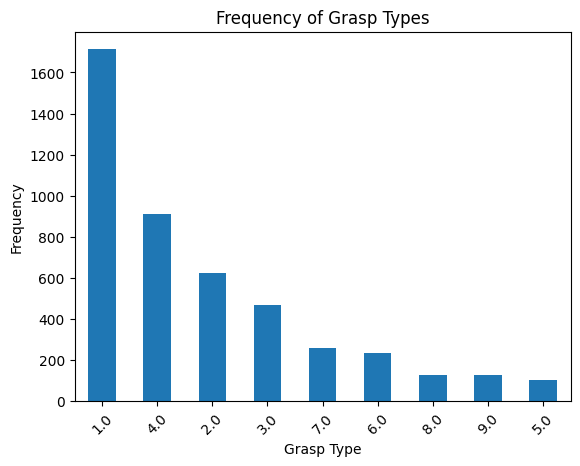

In [23]:
# Calculate value counts
grasp_counts = df['GRASP_DH'].value_counts()
print(grasp_counts)
# Plotting
grasp_counts.plot(kind='bar')
plt.title('Frequency of Grasp Types')
plt.xlabel('Grasp Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

discarding the grasp type 9 because these are labeled as "others"

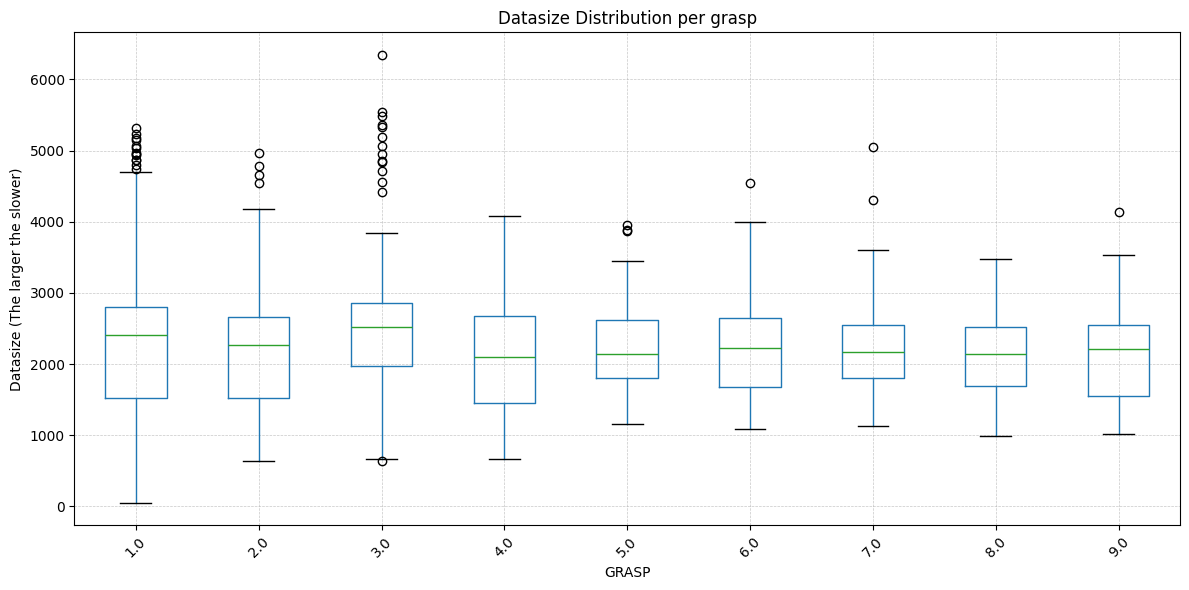

In [24]:
 # Group by 'grasp_dh' and extract the 'datasize'
datasize_per_grasp = df.groupby('GRASP_DH')['datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_grasp.items()})

# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6))  # Define the figure size
datasize_df.boxplot()  # Create a box plot
plt.title(f'Datasize Distribution per grasp')  # Set the title of the plot
plt.xlabel('GRASP')  # Set the x-axis label
plt.ylabel('Datasize (The larger the slower)')  # Set the y-axis label
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Show the plot

### Histogram by TASK HEIGHT

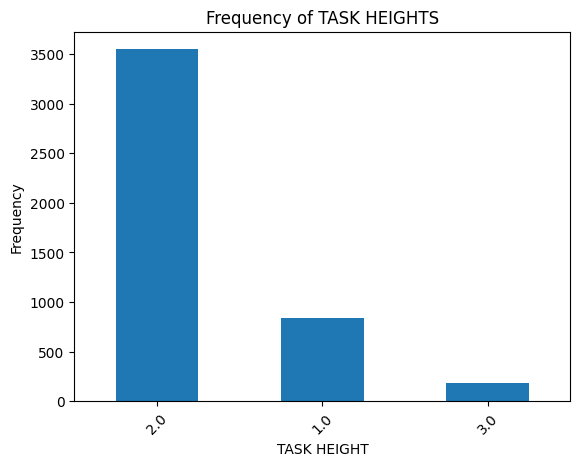

In [25]:
# Calculate value counts
t_height_counts = df['TASK_HEIGHT'].value_counts()

# Plotting
t_height_counts.plot(kind='bar')
plt.title('Frequency of TASK HEIGHTS')
plt.xlabel('TASK HEIGHT')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

In [26]:
task_theight_counts = df.groupby('T')['TASK_HEIGHT'].value_counts().unstack(fill_value=0)
task_theight_counts

TASK_HEIGHT,1.0,2.0,3.0
T,,,
102.0,26,26,0
103.0,26,26,0
104.0,26,26,0
105.0,24,24,0
106.0,24,24,0
...,...,...,...
344.0,0,26,0
345.0,0,26,0
346.0,0,26,0


### Histogram by PARTICIPANT

[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 170, 169, 93, 93, 89, 84, 84, 84, 84, 83]


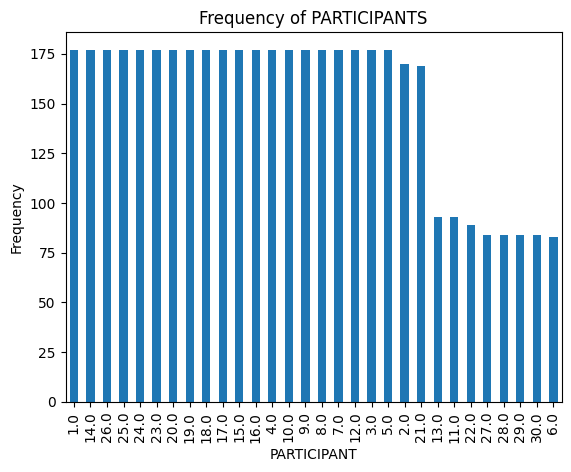

In [27]:
# Calculate value counts
participant_counts = df['PARTICIPANT'].value_counts()
print(list(participant_counts))
# Plotting
participant_counts.plot(kind='bar')
plt.title('Frequency of PARTICIPANTS')
plt.xlabel('PARTICIPANT')
plt.ylabel('Frequency')
plt.show()

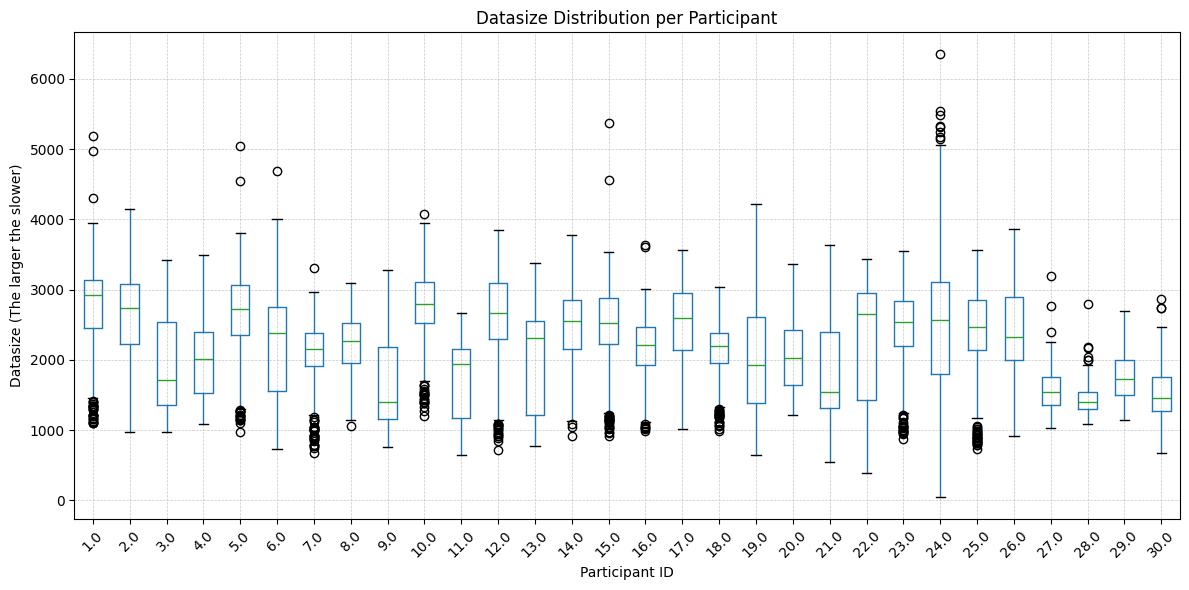

In [28]:
 # Group by 'PARTICIPANT' and extract the 'datasize'
datasize_per_participant = df.groupby('PARTICIPANT')['datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_participant.items()})

# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6))  # Define the figure size
datasize_df.boxplot()  # Create a box plot
plt.title(f'Datasize Distribution per Participant')  # Set the title of the plot
plt.xlabel('Participant ID')  # Set the x-axis label
plt.ylabel('Datasize (The larger the slower)')  # Set the y-axis label
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Show the plot

## 3- EXPLAINING BIMODALITY (data analysis on datasize cases)

### Histogram of datasize depending on task (T)

In [29]:
# @title task type { vertical-output: true, display-mode: "form" }
task = df['T'].unique()
print('Task types are: ')
print (task)

task_type = 102. # @param {type:"number"}

Task types are: 
[102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143.
 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 202. 203. 204.
 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231. 232.
 233. 234. 302. 303. 304. 305. 306. 307. 308. 309. 310. 311. 312. 313.
 314. 315. 316. 317. 318. 319. 320. 321. 322. 323. 324. 325. 326. 327.
 329. 330. 331. 332. 333. 334. 335. 336. 337. 338. 339. 340. 341. 344.
 345. 346. 347. 349.]


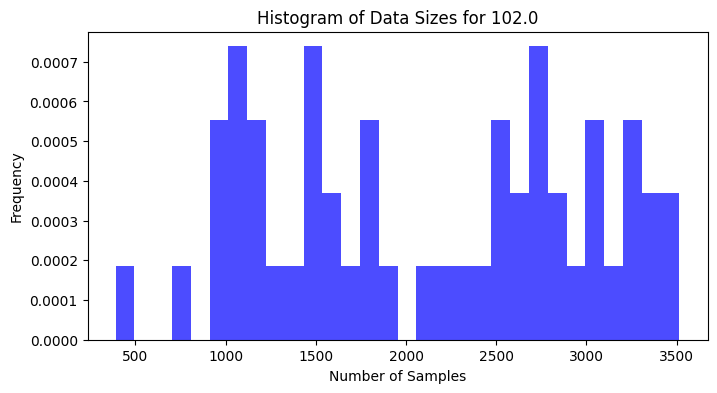

In [30]:
#task = df['T'].unique()
#print(task)
# Check if the user input is valid
if task_type in task:
    # Filter the data for the user-selected grasp type
    subset = df[df['T'] == task_type]

    # Create a plot
    plt.figure(figsize=(8, 4))  # Adjusted size for a single plot
    plt.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    plt.title(f'Histogram of Data Sizes for {task_type}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Invalid task type. Please enter a valid type.")

In [31]:
len(task)

144

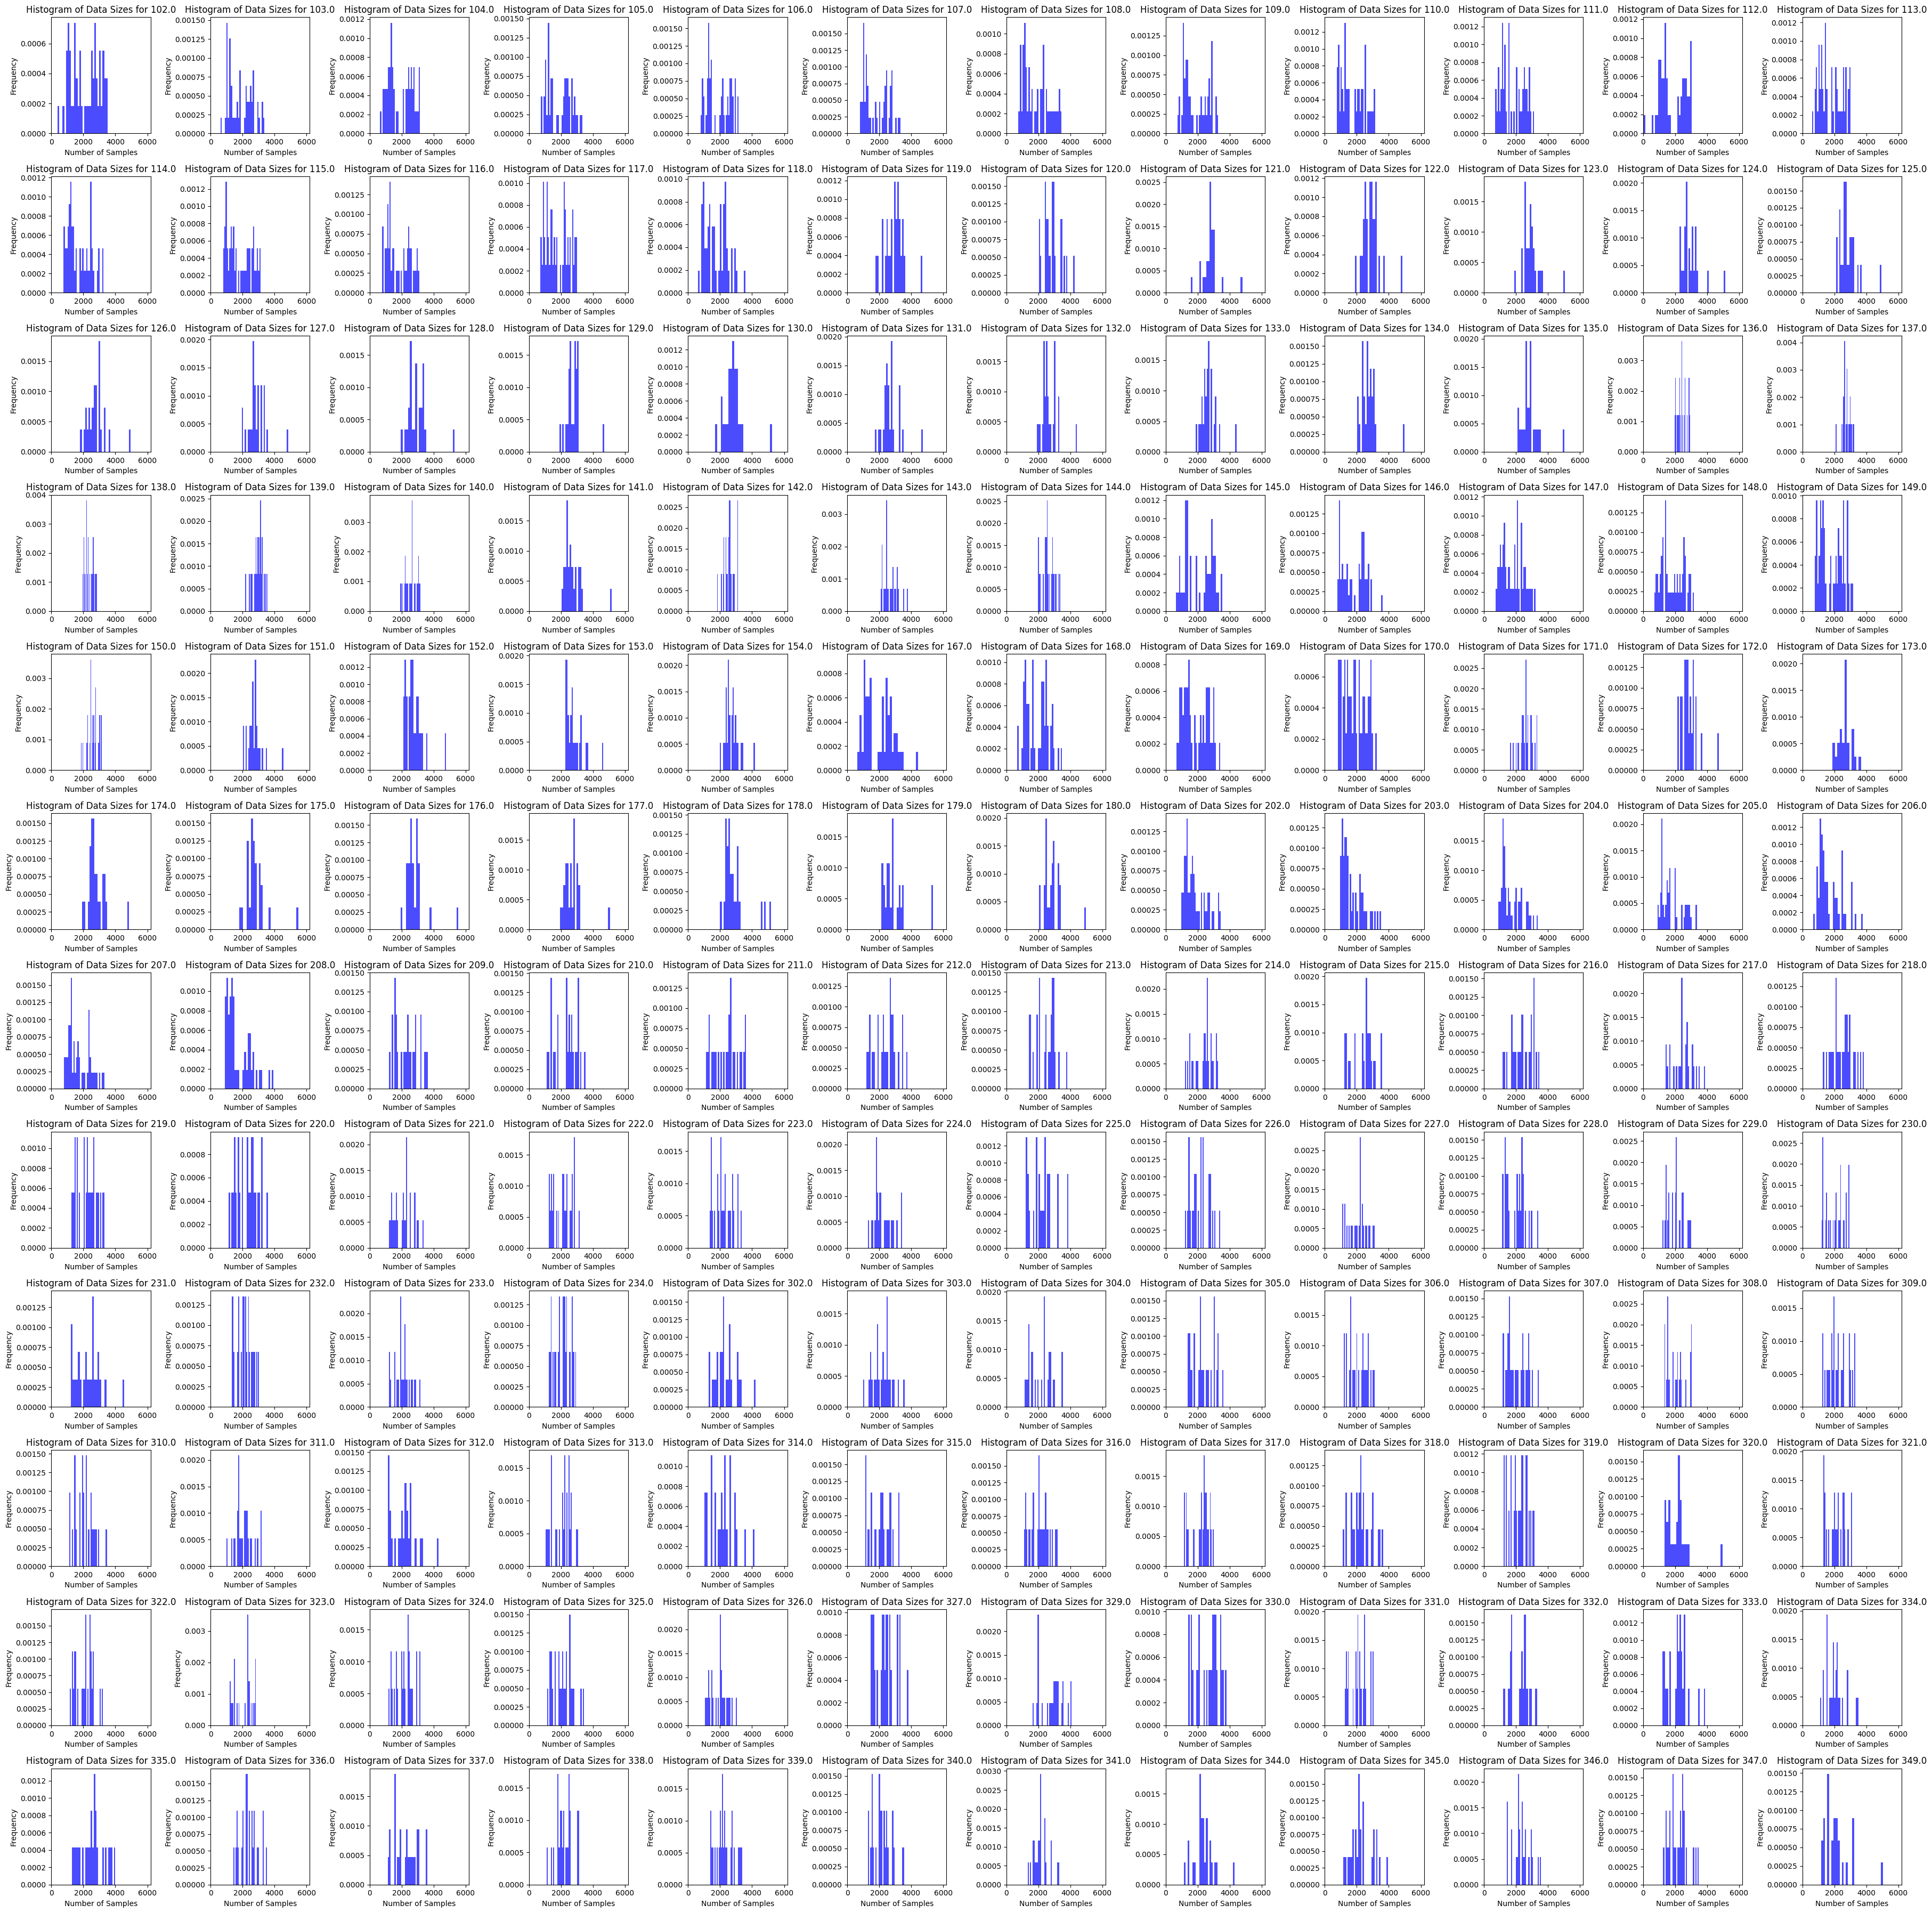

In [32]:
task_types = df['T'].unique()

# Create a figure and set of subplots
nrows = ncols = int(np.ceil(np.sqrt(144)))  # Makes a square grid large enough for all tasks

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 3))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, task_types):
    subset = df[df['T'] == t]
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)

    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on grasp type

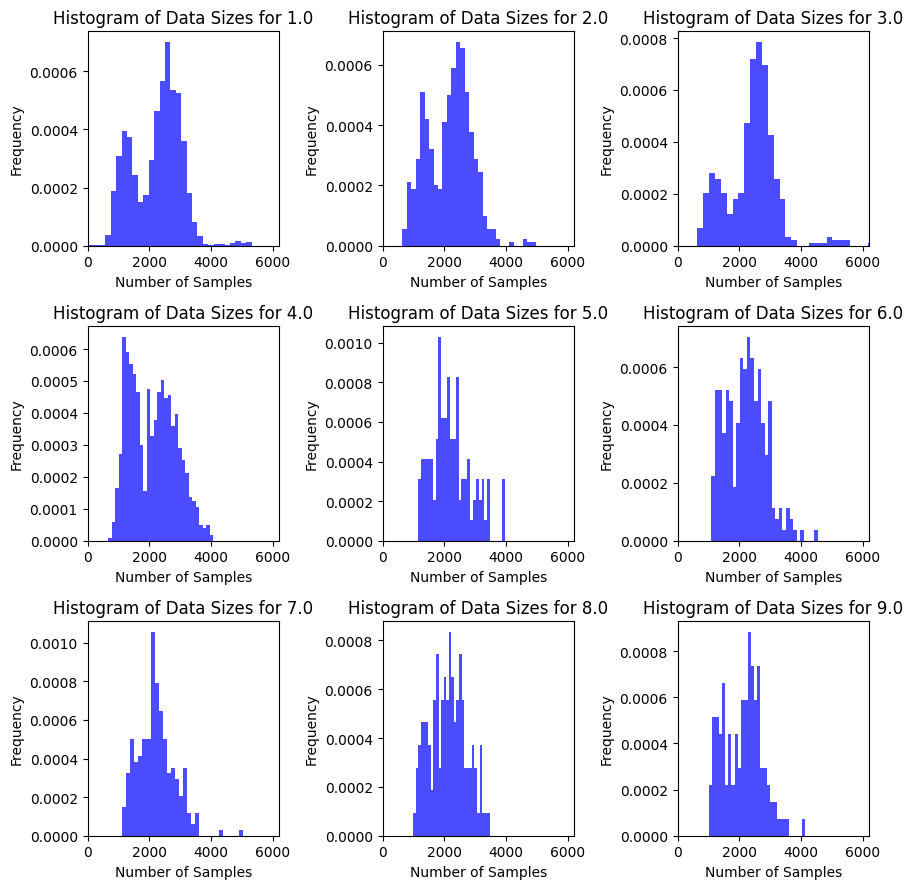

In [33]:
grasp_types = df['GRASP_DH'].unique()

# Create a figure and set of subplots
nrows = ncols = int(np.ceil(np.sqrt(9)))  # Makes a square grid large enough for all tasks

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 3))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, grasp_types):
    subset = df[df['GRASP_DH'] == t]
    #print(len(subset))
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)
    #ax.set_ylim(0, 250)
    #ax.set_yscale('log')

    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on task height

844
3547
182


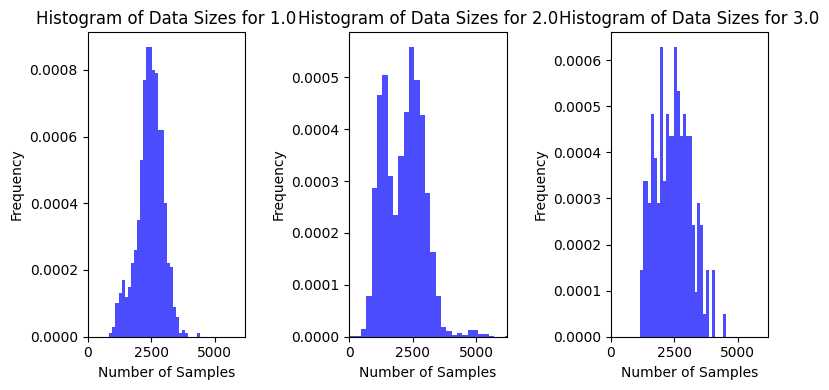

In [34]:
task_heights = df['TASK_HEIGHT'].unique()

# Create a figure and set of subplots

fig, axes = plt.subplots(ncols=3, figsize=(8,4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, task_heights):
    subset = df[df['TASK_HEIGHT'] == t]
    print(len(subset))
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)
    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on participant height



height bin 157.0-168.3 cm
num of rows: 1138
PARTICIPANT
1.0     177
12.0    177
16.0    177
18.0    177
19.0    177
21.0    169
29.0     84
Name: count, dtype: int64


height bin 168.3-179.7 cm
num of rows: 2384
PARTICIPANT
5.0     177
7.0     177
9.0     177
10.0    177
14.0    177
15.0    177
17.0    177
20.0    177
23.0    177
24.0    177
25.0    177
11.0     93
13.0     93
27.0     84
30.0     84
6.0      83
Name: count, dtype: int64


height bin 179.7-191.0 cm
num of rows: 1051
PARTICIPANT
3.0     177
4.0     177
8.0     177
26.0    177
2.0     170
22.0     89
28.0     84
Name: count, dtype: int64




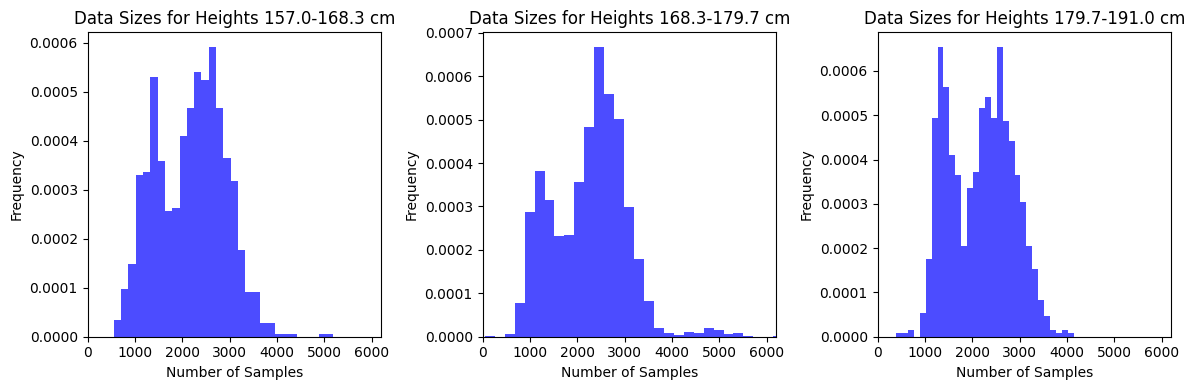

In [35]:
# Bin the height data
min_height = df['HEIGHT'].min() - 1
max_height = df['HEIGHT'].max() + 1

bins = np.linspace(min_height, max_height, num=4)
df['HEIGHT_BIN'] = pd.cut(df['HEIGHT'], bins=bins, include_lowest=True, labels=[f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)])

# Get the unique bins
height_bins = df['HEIGHT_BIN'].unique().categories

# Create a figure and set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(height_bins), figsize=(12, 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for each height bin
for ax, bin_label in zip(axes, height_bins):
    subset = df[df['HEIGHT_BIN'] == bin_label]
    print(f'height bin {bin_label} cm')
    print('num of rows:', len(subset))
    participants = subset['PARTICIPANT'].value_counts()
    print(participants)
    print('\n')
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density= True)
    ax.set_xlim(0, 6200)
    ax.set_title(f'Data Sizes for Heights {bin_label} cm')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on participant height AND task height


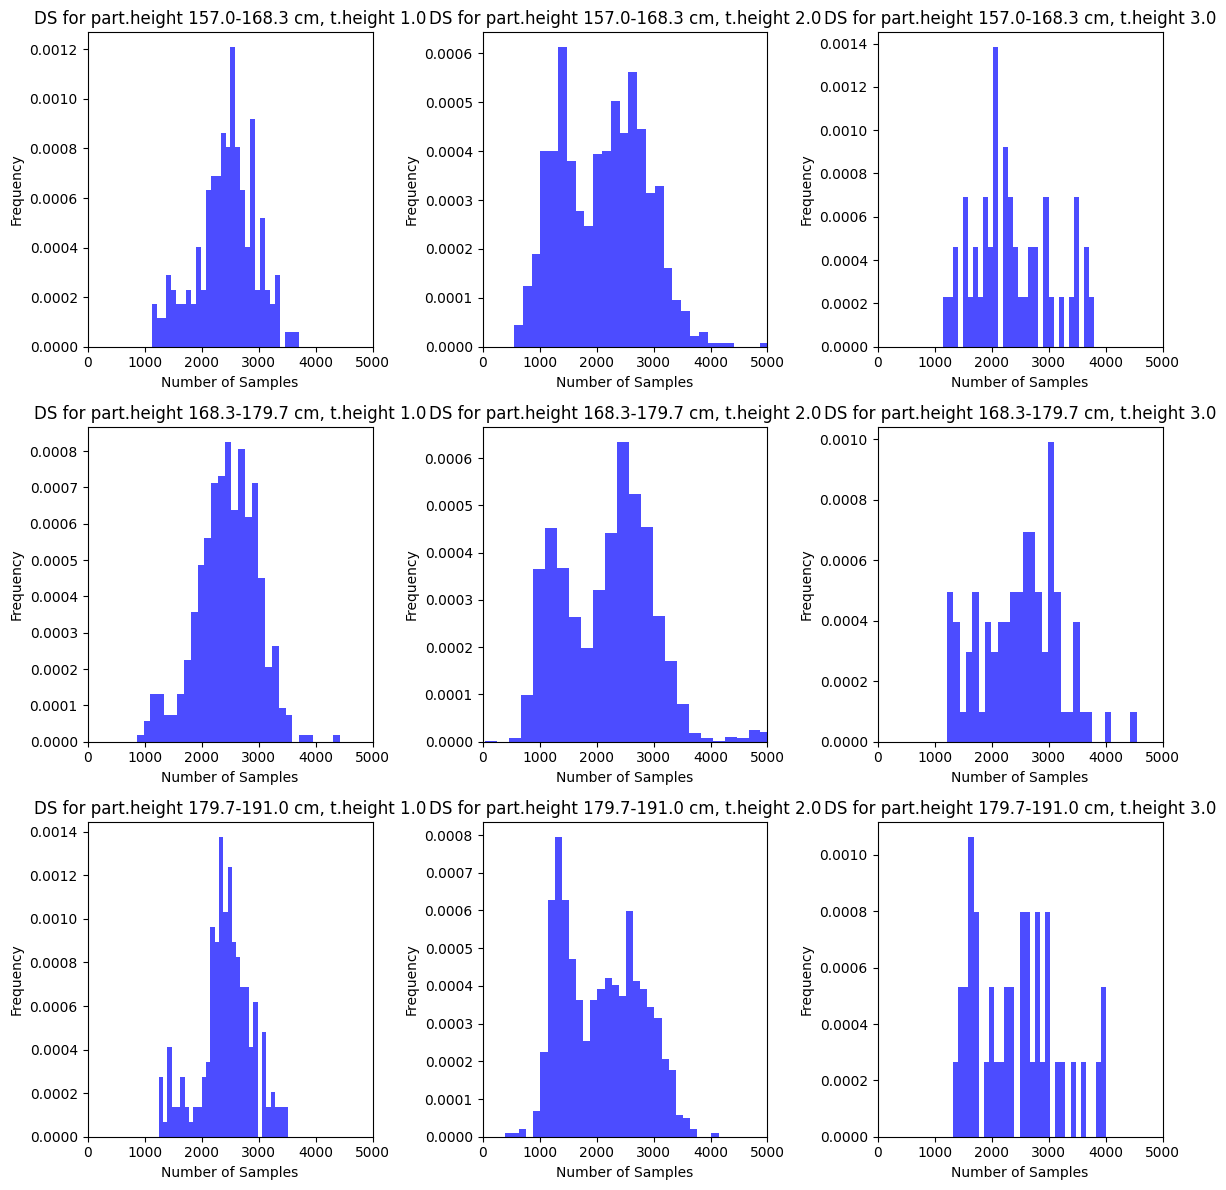

In [36]:
task_heights = df['TASK_HEIGHT'].unique()
task_heights.sort()

# Create figure and subplots
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)))
axes = axes.flatten()

# Dictionary to store subsets
subsets = {}

# Iterate through each participant height bin
for i, height_bin in enumerate(height_bins):
    for j, task_height in enumerate(task_heights):
        ax = axes[i * len(task_heights) + j]  # Locate the right subplot
        subset_key = f'{height_bin}_{task_height}'
        subsets[subset_key] = df[(df['HEIGHT_BIN'] == height_bin) & (df['TASK_HEIGHT'] == task_height)]

        # Plotting
        ax.hist(subsets[subset_key]['datasize'], bins=30, color='blue', alpha=0.7, density=True)
        ax.set_xlim(0, 5000)

        ax.set_title(f'DS for part.height {height_bin} cm, t.height {task_height}')
        ax.set_xlabel('Number of Samples')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


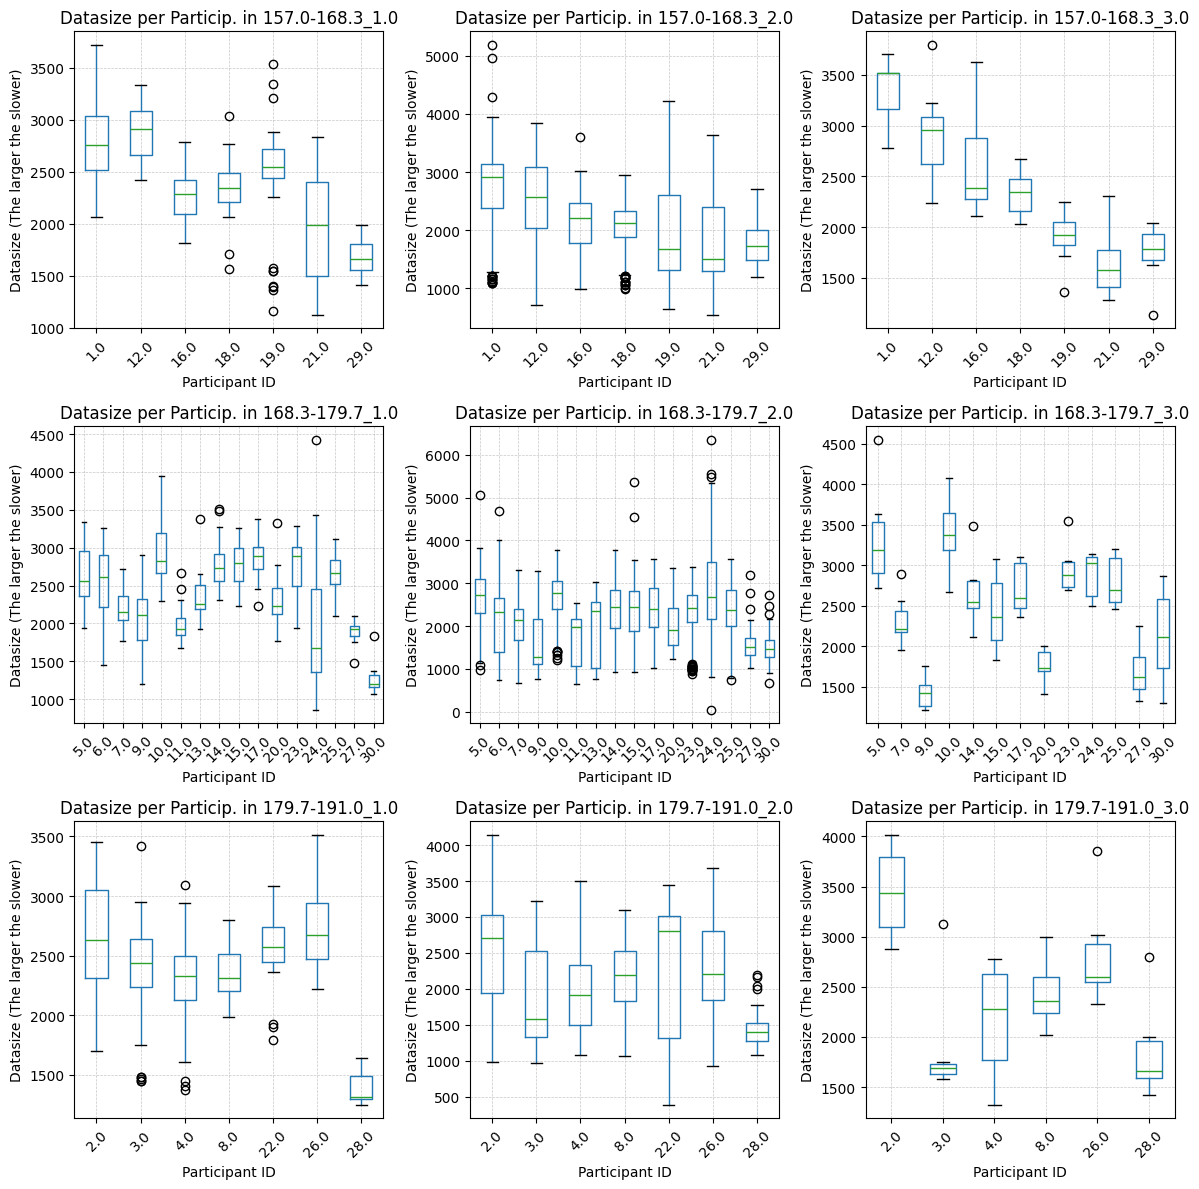

In [37]:
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)), squeeze=False)
axes = axes.flatten()

for i, (key, subset) in enumerate(subsets.items()):
    # Group by 'PARTICIPANT' and extract the 'datasize'
    datasize_per_participant = subset.groupby('PARTICIPANT')['datasize'].apply(list)

    # Create a DataFrame from the series within the group
    datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_participant.items()})

    # Plotting the boxplot on the subplot
    ax = axes[i]
    datasize_df.boxplot(ax=ax)  # Pass the subplot axis to the boxplot function
    ax.set_title(f'Datasize per Particip. in {key}')  # Set the title of the subplot
    ax.set_xlabel('Participant ID')  # Set the x-axis label of the subplot
    ax.set_ylabel('Datasize (The larger the slower)')  # Set the y-axis label of the subplot
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

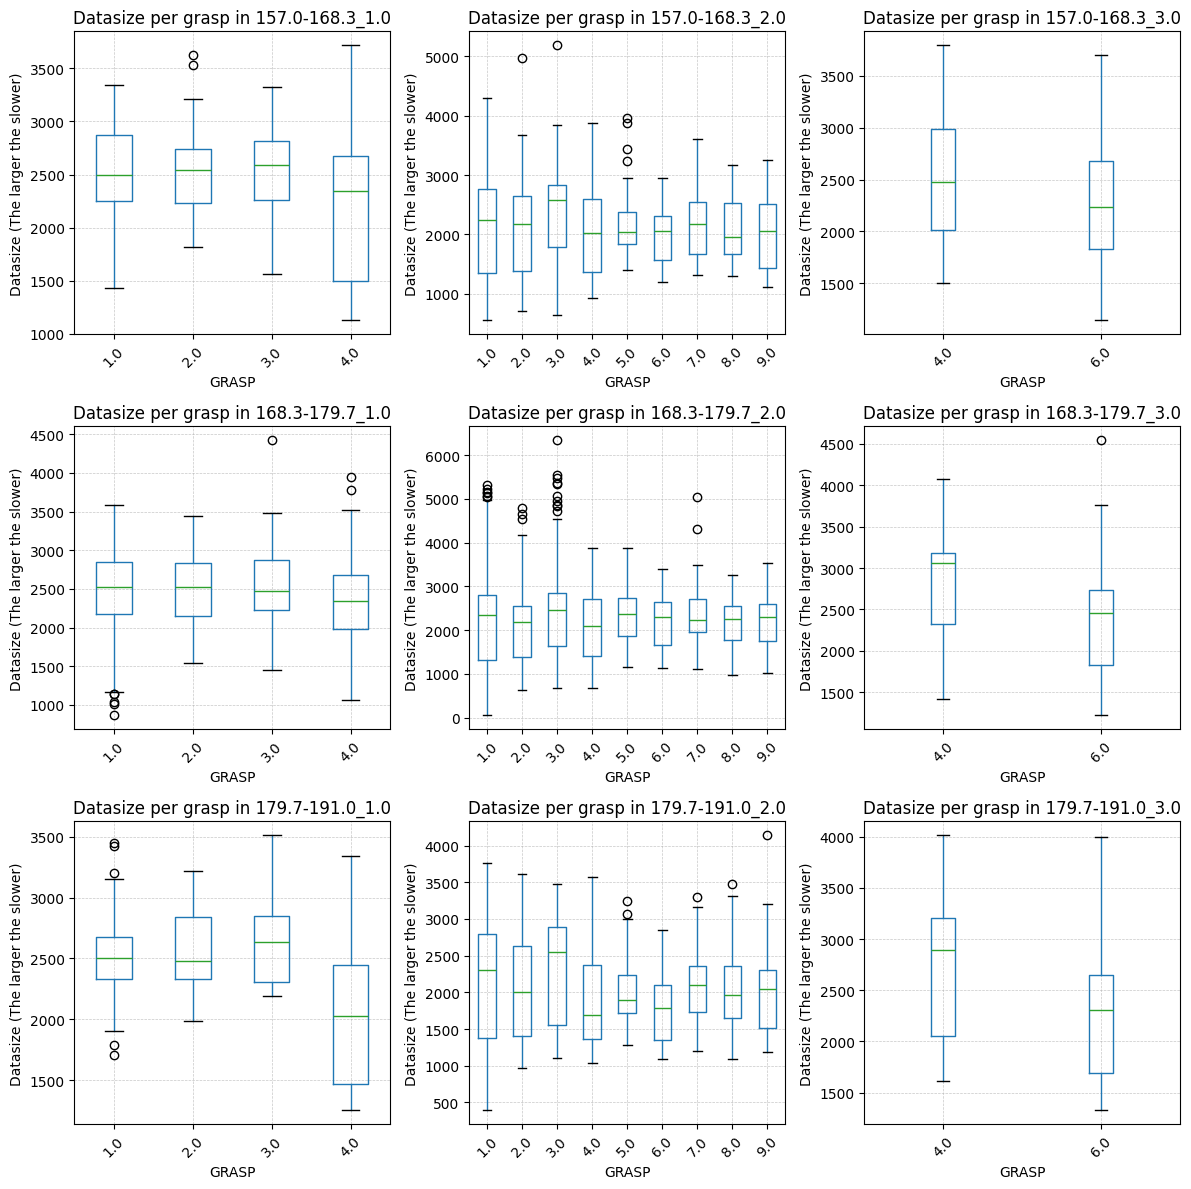

In [38]:
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)), squeeze=False)
axes = axes.flatten()

for i, (key, subset) in enumerate(subsets.items()):
    # Group by 'GRASP_DH' and extract the 'datasize'
    datasize_per_grasp = subset.groupby('GRASP_DH')['datasize'].apply(list)

    # Create a DataFrame from the series within the group
    datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_grasp.items()})

    # Plotting the boxplot on the subplot
    ax = axes[i]
    datasize_df.boxplot(ax=ax)  # Pass the subplot axis to the boxplot function
    ax.set_title(f'Datasize per grasp in {key}')  # Set the title of the subplot
    ax.set_xlabel('GRASP')  # Set the x-axis label of the subplot
    ax.set_ylabel('Datasize (The larger the slower)')  # Set the y-axis label of the subplot
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [39]:
# Print each subset
for key, subset in subsets.items():
    print(f"\nSubset for HEIGHT_BIN and TASK_HEIGHT {key}:")
    print(len(subset))
    participants = subset['PARTICIPANT'].value_counts()
    print(participants)
    print('----------'+'\n')



Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_1.0:
201
PARTICIPANT
1.0     33
12.0    33
16.0    33
18.0    33
19.0    33
21.0    29
29.0     7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_2.0:
888
PARTICIPANT
1.0     137
12.0    137
16.0    137
18.0    137
19.0    137
21.0    133
29.0     70
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_3.0:
49
PARTICIPANT
1.0     7
12.0    7
29.0    7
16.0    7
18.0    7
19.0    7
21.0    7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 168.3-179.7_1.0:
450
PARTICIPANT
5.0     33
7.0     33
9.0     33
10.0    33
14.0    33
15.0    33
17.0    33
20.0    33
23.0    33
24.0    33
25.0    33
11.0    26
13.0    26
6.0     21
27.0     7
30.0     7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 168.3-179.7_2.0:
1843
PARTICIPANT
5.0     137
7.0     137
9.0     137
10.0    137
14.0    137
15.0    137
17.0    1